<a href="https://colab.research.google.com/github/QuantGuy01/microeconomics/blob/main/graphs01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import sympy as sy

In [45]:

def draw_intersect_curves(plt,f1,f2,xlinspace,IntersectNumber):

  # find intersections
  # https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
  idx_cross = np.argwhere(np.diff(np.sign(f1 - f2))).flatten()

  # Calculate Q/P coordinates for intersections
  CrossX=xlinspace[idx_cross]
  CrossY=f2[idx_cross]
  plt.plot(CrossX, CrossY, 'ro')
  plt.annotate('Equilibrium '+str(IntersectNumber), (CrossX,CrossY), (CrossX+5, CrossY-3) )

  if float(CrossX) not in list(plt.xticks()[0]):
    plt.xticks(list(plt.xticks()[0]) + [float(CrossX)])
  if float(CrossY) not in list(plt.yticks()[0]):
    plt.yticks(list(plt.yticks()[0]) + [float(CrossY)])
  #$y_i$
  plt.annotate('$Q_'+str(IntersectNumber)+'$', (CrossX,0), (CrossX-1, 0-25), fontsize=12 )
  plt.annotate('$P_'+str(IntersectNumber)+'$', (0,CrossY), (0-15, CrossY-1), fontsize=12 )

  # print vertical line from x,x to y,y
  plt.plot((CrossX, CrossX), (0, CrossY), 'r--', linewidth=0.5)
  # print horizontal line from x,x to y,y
  plt.plot((0, CrossX), (CrossY, CrossY), 'r--', linewidth=0.5)

def draw_intersect_y(plt,f,xlinspace):
  #idx_cross_y = np.argwhere(np.diff(np.sign(xlinspace - 0))).flatten()
  #print(idx_cross_y)
  #crossX=Qs[idx_supply_cross_y]
  crossY=f[[0,]]

  if float(crossY) not in list(plt.yticks()[0]):
    plt.yticks(list(plt.yticks()[0]) + [float(crossY)])

def get_horizontal_intersect(f1,f2,xlinspace):

  # find intersections
  # https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
  idx_cross = np.argwhere(np.diff(np.sign(f1 - f2))).flatten()

  # Calculate Q/P coordinates for intersections
  CrossX=xlinspace[idx_cross]
  CrossY=f2[idx_cross]
  #print(CrossX)
  #print(CrossY)
  if CrossX.shape[0]==0:
    print("error, no intersection please fix spacers")
  if CrossY.shape[0]==0:
    print("error, no intersection please fix spacers")
  return (int(CrossX),int(CrossY))



No handles with labels found to put in legend.


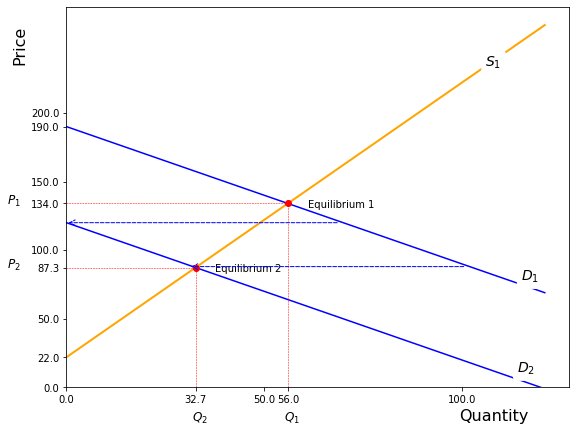

In [49]:
plt.figure().clear()
plt.close()
plt.rcParams['figure.figsize'] = [9, 7]

#https://scriptverse.academy/tutorials/python-matplotlib-plot-straight-line.html
maxX=121
maxY=221
multi=1000
xlinspace=np.linspace(0,maxX,int(maxX*multi))
Qs = xlinspace
Ps = (Qs+20)/3 # x = Quantity Supplied
Ps = (Qs+11)*2 # x = Quantity Supplied
Qd = xlinspace
Pd = -Qd+100 # x = Quantity Demanded
Pd = -Qd+190 # x = Quantity Demanded
QdNew = xlinspace
PdNew = -QdNew+120 # x = Quantity Demanded

plt.plot(Qs, Ps, color='orange', linewidth=2)
plt.plot(Qd, Pd, color='blue', linewidth=1.5)
plt.plot(QdNew, PdNew, color='blue', linewidth=1.5)

# add S1 / S2 / D1 / D2 labels as needed
labelSx=maxX-int(maxX/8)
labelSy=int(Ps[int(labelSx)*multi])
labelDx=int(Pd[0]-int(maxX/20))
labelDy=int(maxY/20)
if labelDx>maxX:
  labelDx=int(maxX-int(maxX/20))
  labelDy=int(Pd[int(maxX-10)*multi])
labelDNewx=int(PdNew[0]-int(maxX/20))
labelDNewy=int(maxY/20)
plt.annotate('$S_1$', (labelSx,labelSy),(labelSx,labelSy),fontsize=14,bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=1))
plt.annotate('$D_1$', (labelDx,labelDy),(labelDx,labelDy),fontsize=14,bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=1))
plt.annotate('$D_2$', (labelDNewx,labelDNewy),(labelDNewx,labelDNewy),fontsize=14,bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=1))

#plt.title("Supply and Demand")
plt.legend(frameon = False)
plt.xlabel("Quantity", fontsize=16,position=(0.85,0))#,ha='right', va='top', ma='left')
plt.ylabel("Price", fontsize=16,position=(-0.1,0.9))#,ha='left', va='top', ma='left')
plt.xlim(xmin=0.0)
plt.ylim(ymin=0.0)

plt.xticks(np.arange(0, maxX, step=50))
plt.yticks(np.arange(0, maxY, step=50))

draw_intersect_curves(plt,Pd,Ps,xlinspace,1)
draw_intersect_y(plt,Ps,xlinspace)
draw_intersect_y(plt,Pd,xlinspace)
draw_intersect_curves(plt,PdNew,Ps,xlinspace,2)

fmt = lambda x: "{:.1f}".format(x)
xformat=[fmt(i) for i in plt.xticks()[0]]
plt.xticks(list(plt.xticks()[0]),xformat)
yformat=[fmt(i) for i in plt.yticks()[0]]
plt.yticks(list(plt.yticks()[0]),yformat)

# add D1 => D2 arrows
# spacer= divider from top / bottom
spacerdown=2.5
spacerup=2.2
#plt.plot(Qs, xlinspace*0+int(maxY/spacerdown), color='green', linewidth=1)
#plt.plot(Qs, xlinspace*0+int(maxY-(maxY/spacerup)), color='green', linewidth=1)
coor1=get_horizontal_intersect(PdNew,xlinspace*0+int(maxY/spacerdown),xlinspace)
coor2=get_horizontal_intersect(Pd,xlinspace*0+int(maxY/spacerdown),xlinspace)
plt.annotate('', coor1,coor2,fontsize=14, arrowprops=dict(arrowstyle="->",linestyle="--",
                            connectionstyle="arc3",color='blue'))
coor1=get_horizontal_intersect(PdNew,xlinspace*0+int(maxY-(maxY/spacerup)),xlinspace)
coor2=get_horizontal_intersect(Pd,xlinspace*0+int(maxY-(maxY/spacerup)),xlinspace)
plt.annotate('', coor1,coor2,fontsize=14, arrowprops=dict(arrowstyle="->",linestyle="--",
                            connectionstyle="arc3",color='blue'))
print('')


